Use a pretrained monocular depth estimation model from TensorFlow Hub to predict a depth map from a single RGB image.

In [13]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
model_url = "https://tfhub.dev/intel/midas/v2_1_small/1"
local_path = hub.resolve(model_url)
depth_model = tf.saved_model.load(local_path, tags=["serve"])
inference = depth_model.signatures["serving_default"]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [22]:
#Preprocess image: resize, normalize, batch
def load_and_preprocess(image_url):
    image_path=tf.keras.utils.get_file("input.jpg",origin=image_url)
    img=Image.open(image_path).convert("RGB").resize((256,256))
    img=np.array(img).astype(np.float32)/255.0
    img=tf.convert_to_tensor(img)
    img = tf.transpose(img, [2, 0, 1])
    return tf.expand_dims(img,0)

In [23]:
# Load sample image
image_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg"
input_image = load_and_preprocess(image_url)

In [28]:
# Inference
depth_output = inference(input_image)["default"]
depth_map = tf.squeeze(depth_output)

In [29]:
# Resize and normalize for display
depth_map = tf.image.resize(depth_map[..., tf.newaxis], (256, 256))
depth_min = tf.reduce_min(depth_map)
depth_max = tf.reduce_max(depth_map)
normalized_depth = (depth_map - depth_min) / (depth_max - depth_min)

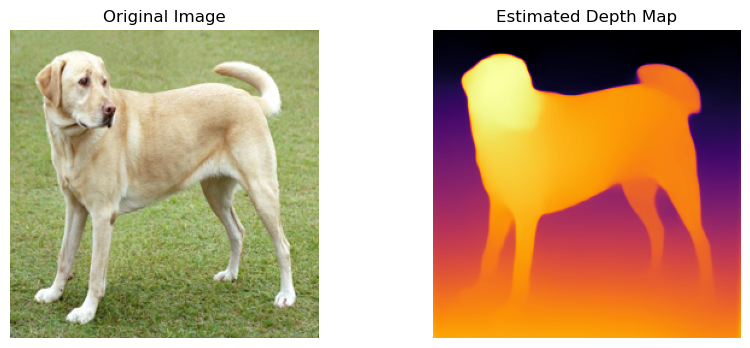

In [30]:
# Display results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(tf.transpose(tf.squeeze(input_image), [1, 2, 0]))  # back to HWC
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tf.squeeze(normalized_depth), cmap='inferno')
plt.title("Estimated Depth Map")
plt.axis('off')
plt.show()